# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from urllib.parse import quote_plus
from pprint import pprint 
import json
from os import path

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"
output_data_file = path.join("output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding latitude/longitude (lat_lng) and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [3]:
# creating an empty list 
city_data = []

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af1d12a1c4e0e958b9f4a3231142e8e&q=albany


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
for city in cities: 
    try:
        r = requests.get('http://api.openweathermap.org/data/2.5/weather', params={'q': city, 'appid': weather_api_key})
        r_data = r.json()
        #Creating variables for the JSON object   
        c_ID = r_data["id"]
        name = r_data["name"]
        lat= r_data["coord"]['lat']
        lon= r_data["coord"]['lon']
        maxtemp = r_data["main"]['temp_max']
        humidity = r_data["main"]["humidity"]
        clouds = r_data["clouds"]['all']
        windSpeed = r_data["wind"]['speed']
        country = r_data["sys"]["country"]
        date = r_data['dt']
        pprint(f'Evaluating city number: {c_ID}, {r_data["name"]}')
#creating a list of dictionaries to build the dataframe         
        city_data.append({
                "City" : name,
                "Lat" : lat,    
                "Lng" : lon,
                "Max Temp" : maxtemp,
                "Humidity" : humidity,
                "Cloudiness" : clouds,
                "Wind Speed" : windSpeed,
                "Country" : country,      
                "CityDate" : date
       })
        pprint(f'Appending {name} to "city_data"')
    except KeyError:
        pass


'Evaluating city number: 6201424, Mataura'
'Appending Mataura to "city_data"'
'Evaluating city number: 5848280, Kapaa'
'Appending Kapaa to "city_data"'
'Evaluating city number: 4333811, Morgan City'
'Appending Morgan City to "city_data"'
'Evaluating city number: 1066310, Betioky'
'Appending Betioky to "city_data"'
'Evaluating city number: 3366880, Hermanus'
'Appending Hermanus to "city_data"'
'Evaluating city number: 6185377, Yellowknife'
'Appending Yellowknife to "city_data"'
'Evaluating city number: 496307, Severnyy-Kospashskiy'
'Appending Severnyy-Kospashskiy to "city_data"'
'Evaluating city number: 1296736, Shwebo'
'Appending Shwebo to "city_data"'
'Evaluating city number: 2108857, Gizo Government Station'
'Appending Gizo Government Station to "city_data"'
'Evaluating city number: 2163355, Hobart'
'Appending Hobart to "city_data"'
'Evaluating city number: 6323121, Florianópolis'
'Appending Florianópolis to "city_data"'
'Evaluating city number: 2136697, Lakatoro'
'Appending Lakatoro

'Evaluating city number: 3372964, Lagoa'
'Appending Lagoa to "city_data"'
'Evaluating city number: 2110227, Butaritari'
'Appending Butaritari to "city_data"'
'Evaluating city number: 5955826, Fort Frances'
'Appending Fort Frances to "city_data"'
'Evaluating city number: 964420, Port Elizabeth'
'Appending Port Elizabeth to "city_data"'
'Evaluating city number: 2742416, Barcelos'
'Appending Barcelos to "city_data"'
'Evaluating city number: 5110365, Broome'
'Appending Broome to "city_data"'
'Evaluating city number: 3421193, Paamiut'
'Appending Paamiut to "city_data"'
'Evaluating city number: 4285268, Bowling Green'
'Appending Bowling Green to "city_data"'
'Evaluating city number: 1568574, Qui Nhon'
'Appending Qui Nhon to "city_data"'
'Evaluating city number: 4696233, Harlingen'
'Appending Harlingen to "city_data"'
'Evaluating city number: 1505429, Iskitim'
'Appending Iskitim to "city_data"'
'Evaluating city number: 1067565, Beloha'
'Appending Beloha to "city_data"'
'Evaluating city number

'Evaluating city number: 1495626, Pangody'
'Appending Pangody to "city_data"'
'Evaluating city number: 2136825, Isangel'
'Appending Isangel to "city_data"'
'Evaluating city number: 3421319, Nuuk'
'Appending Nuuk to "city_data"'
'Evaluating city number: 934479, Grand Gaube'
'Appending Grand Gaube to "city_data"'
'Evaluating city number: 5563839, Fortuna'
'Appending Fortuna to "city_data"'
'Evaluating city number: 5380437, Pacific Grove'
'Appending Pacific Grove to "city_data"'
'Evaluating city number: 3359638, Walvis Bay'
'Appending Walvis Bay to "city_data"'
'Evaluating city number: 1106643, Quatre Cocos'
'Appending Quatre Cocos to "city_data"'
'Evaluating city number: 1058381, Morondava'
'Appending Morondava to "city_data"'
'Evaluating city number: 3576994, Cockburn Town'
'Appending Cockburn Town to "city_data"'
'Evaluating city number: 1786060, Yuanping'
'Appending Yuanping to "city_data"'
'Evaluating city number: 2216645, Hūn'
'Appending Hūn to "city_data"'
'Evaluating city number: 

'Evaluating city number: 3412093, Vestmannaeyjar'
'Appending Vestmannaeyjar to "city_data"'
'Evaluating city number: 142255, Bāfq'
'Appending Bāfq to "city_data"'
'Evaluating city number: 1734313, Paka'
'Appending Paka to "city_data"'
'Evaluating city number: 2643044, Margate'
'Appending Margate to "city_data"'
'Evaluating city number: 2155415, New Norfolk'
'Appending New Norfolk to "city_data"'
'Evaluating city number: 1263677, Mankāpur'
'Appending Mankāpur to "city_data"'
'Evaluating city number: 88319, Benghazi'
'Appending Benghazi to "city_data"'
'Evaluating city number: 2392087, Porto-Novo'
'Appending Porto-Novo to "city_data"'
'Evaluating city number: 3932145, Pisco'
'Appending Pisco to "city_data"'
'Evaluating city number: 3414079, Olafsvik'
'Appending Olafsvik to "city_data"'
'Evaluating city number: 1735106, George Town'
'Appending George Town to "city_data"'
'Evaluating city number: 2142316, Yeppoon'
'Appending Yeppoon to "city_data"'
'Evaluating city number: 2175403, Blackwa

'Evaluating city number: 2520645, Cabra'
'Appending Cabra to "city_data"'
'Evaluating city number: 2212775, Sabha'
'Appending Sabha to "city_data"'
'Evaluating city number: 4706057, Lewisville'
'Appending Lewisville to "city_data"'
'Evaluating city number: 1024696, Dondo'
'Appending Dondo to "city_data"'
'Evaluating city number: 2654410, Buckingham'
'Appending Buckingham to "city_data"'
'Evaluating city number: 2036069, Linjiang'
'Appending Linjiang to "city_data"'
'Evaluating city number: 3939761, Hualmay'
'Appending Hualmay to "city_data"'
'Evaluating city number: 363656, Yambio'
'Appending Yambio to "city_data"'
'Evaluating city number: 2012956, Yerbogachën'
'Appending Yerbogachën to "city_data"'
'Evaluating city number: 1252668, Ziro'
'Appending Ziro to "city_data"'
'Evaluating city number: 2036536, Minzhu'
'Appending Minzhu to "city_data"'
'Evaluating city number: 5955902, Fort Nelson'
'Appending Fort Nelson to "city_data"'
'Evaluating city number: 3516171, Barra de Tecoanapa'
'Ap

'Evaluating city number: 2120334, Tymovskoye'
'Appending Tymovskoye to "city_data"'
"Evaluating city number: 2013865, Ust'-Uda"
'Appending Ust\'-Uda to "city_data"'
'Evaluating city number: 3837056, San Luis'
'Appending San Luis to "city_data"'
'Evaluating city number: 3625929, Tucupita'
'Appending Tucupita to "city_data"'
'Evaluating city number: 463355, Zheleznodorozhnyy'
'Appending Zheleznodorozhnyy to "city_data"'
'Evaluating city number: 1514792, Gazojak'
'Appending Gazojak to "city_data"'
'Evaluating city number: 1499053, Megion'
'Appending Megion to "city_data"'
'Evaluating city number: 3395458, Maragogi'
'Appending Maragogi to "city_data"'
'Evaluating city number: 2125906, Dukat'
'Appending Dukat to "city_data"'
'Evaluating city number: 5039421, North Branch'
'Appending North Branch to "city_data"'
'Evaluating city number: 1264310, Mailāni'
'Appending Mailāni to "city_data"'
'Evaluating city number: 3927995, Tambo'
'Appending Tambo to "city_data"'
'Evaluating city number: 17914

In [6]:
pprint(r_data)

{'cod': '404', 'message': 'city not found'}


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# use iloc or loc to select humidity column and then specify conditions (>100) 
#create a dataframe from city_data 
df = pd.DataFrame(city_data)
# seeing if we removed any data from the dataframe
len(df)
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,CityDate
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,18.652081,22.578858,292.872449,71.957643,46.804788,3.345230,1.594774e+09
std,33.595814,90.022860,8.092645,19.830743,41.043207,2.253225,8.184411e+01
min,-54.800000,-179.170000,270.770000,8.000000,0.000000,0.020000,1.594774e+09
25%,-11.750000,-57.620000,286.875000,61.000000,1.000000,1.715000,1.594774e+09
50%,22.290000,27.910000,294.150000,77.000000,40.000000,2.830000,1.594774e+09
75%,47.580000,103.275000,299.185000,87.000000,90.000000,4.450000,1.594774e+09
max,77.480000,179.320000,315.150000,100.000000,100.000000,13.450000,1.594774e+09


In [8]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,CityDate
0,Mataura,-46.19,168.86,281.96,76,3,1.99,NZ,1594773906
1,Kapaa,22.08,-159.32,301.15,74,40,5.70,US,1594773689
2,Morgan City,29.70,-91.21,304.26,74,1,3.60,US,1594773906
3,Betioky,-23.72,44.38,286.90,90,0,0.44,MG,1594773907
4,Hermanus,-34.42,19.23,275.93,95,0,3.13,ZA,1594773701


In [9]:
#creating dataframe without cities with humidity over 100%
df_HumUnder100 = df.loc[df["Humidity"] <= 100]
# checking length of new dataframe
f'There are {len(df_HumUnder100)} cities with humidity 100% or less'

'There are 543 cities with humidity 100% or less'

In [10]:
#  Get the indices of cities that have humidity =< 100%.
df_HumOvr100 = df.loc[df["Humidity"] > 100]
f'There are {len(df_HumOvr100)} cities greater then 100% humidity'

'There are 0 cities greater then 100% humidity'

In [11]:
df_HumUnder100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,CityDate
0,Mataura,-46.19,168.86,281.96,76,3,1.99,NZ,1594773906
1,Kapaa,22.08,-159.32,301.15,74,40,5.70,US,1594773689
2,Morgan City,29.70,-91.21,304.26,74,1,3.60,US,1594773906
3,Betioky,-23.72,44.38,286.90,90,0,0.44,MG,1594773907
4,Hermanus,-34.42,19.23,275.93,95,0,3.13,ZA,1594773701


In [12]:
new_df = df.drop(df_HumOvr100.index)
new_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,CityDate
0,Mataura,-46.19,168.86,281.96,76,3,1.99,NZ,1594773906
1,Kapaa,22.08,-159.32,301.15,74,40,5.70,US,1594773689
2,Morgan City,29.70,-91.21,304.26,74,1,3.60,US,1594773906
3,Betioky,-23.72,44.38,286.90,90,0,0.44,MG,1594773907
4,Hermanus,-34.42,19.23,275.93,95,0,3.13,ZA,1594773701


In [13]:
# converting max temp from Kelvin to Celcius

new_df["Temp (C)"] = new_df["Max Temp"] - 273.15
new_df.drop(["Max Temp"], axis = 1)

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,CityDate,Temp (C)
0,Mataura,-46.19,168.86,76,3,1.99,NZ,1594773906,8.81
1,Kapaa,22.08,-159.32,74,40,5.70,US,1594773689,28.00
2,Morgan City,29.70,-91.21,74,1,3.60,US,1594773906,31.11
3,Betioky,-23.72,44.38,90,0,0.44,MG,1594773907,13.75
4,Hermanus,-34.42,19.23,95,0,3.13,ZA,1594773701,2.78
...,...,...,...,...,...,...,...,...,...
538,Whitehorse,60.72,-135.05,81,90,3.60,CA,1594773753,12.00
539,Ponta Delgada,37.73,-25.67,82,20,2.10,PT,1594773953,20.00
540,Urdoma,61.75,48.54,97,76,2.36,RU,1594773953,14.91
541,Singkang,2.10,102.80,94,20,0.08,MY,1594773953,25.00


### Exporting the dataframe to CSV 

In [14]:
# df.to_csv('file_name.csv')
new_df.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [15]:
# Setting the figure size
fig = plt.figure(figsize=(10,5))

# #Saving the plot as an image
fig.savefig('line plot.jpg', bbox_inches='tight', dpi=250)

<Figure size 720x360 with 0 Axes>

## Latitude vs. Temperature Plot

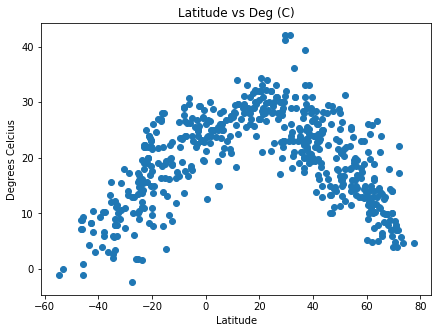

In [16]:
x = new_df["Lat"]
y = new_df["Temp (C)"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Degrees Celcius")
plt.title("Latitude vs Deg (C)")
fig.savefig("Scatterplot_1.png", bbox_inches='tight', dpi=250)
plt.show()

## Latitude vs. Humidity Plot

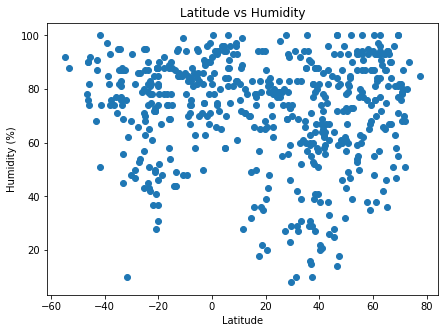

In [17]:
x = new_df["Lat"]
y = new_df["Humidity"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
fig.savefig("Scatterplot_2.png", bbox_inches='tight', dpi=250)
plt.show()

## Latitude vs. Cloudiness Plot

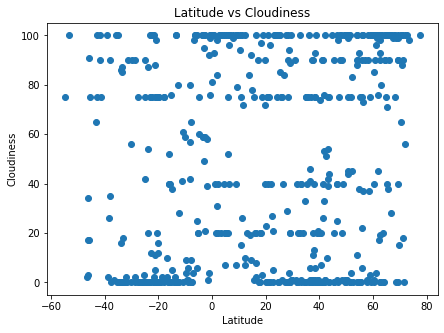

In [18]:
x = new_df["Lat"]
y = new_df["Cloudiness"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
fig.savefig("Scatterplot_3.png", bbox_inches='tight', dpi=250)
plt.show()

## Latitude vs. Wind Speed Plot

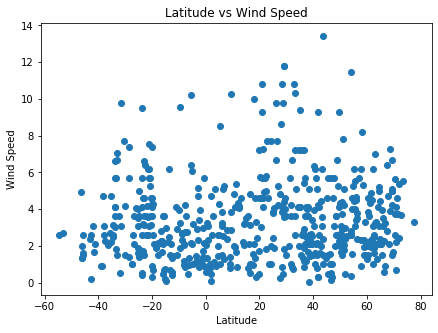

In [19]:
x = new_df["Lat"]
y = new_df["Wind Speed"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
fig.savefig("Scatterplot_4.png", bbox_inches='tight', dpi=250)
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot

In [21]:
# Create Northern and Southern Hemisphere DataFrames
df_NorthHem = new_df.loc[new_df["Lat"] > 0]
df_SouthHem = new_df.loc[new_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.4583711721783889


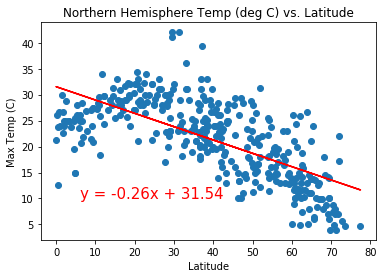

In [22]:
x_Lat = df_NorthHem['Lat']
y_Temp = df_NorthHem['Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Temp)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Temp)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title("Northern Hemisphere Temp (deg C) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5781269923778585


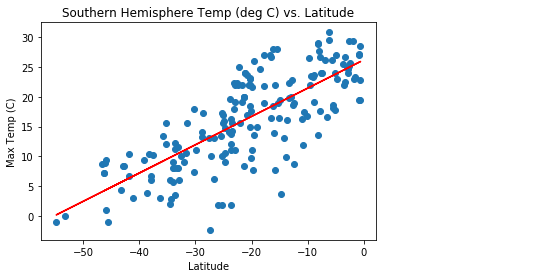

In [23]:
x_Lat = df_SouthHem['Lat']
y_Temp = df_SouthHem['Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Temp)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Temp)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title("Southern Hemisphere Temp (deg C) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.00023780823913723752


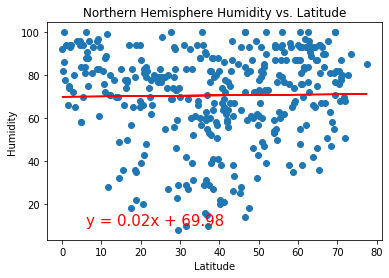

In [24]:
x_Lat = df_NorthHem['Lat']
y_Hum = df_NorthHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Hum)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat, y_Hum)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Humidity vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 6.342871793231716e-07


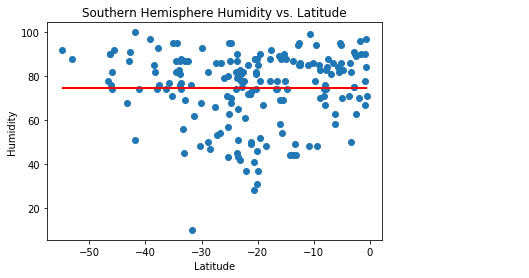

In [25]:
x_Lat = df_SouthHem['Lat']
y_Hum = df_SouthHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Hum)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Hum)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Humidity vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.009457662357809971


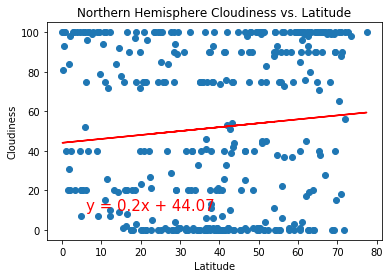

In [26]:
x_Lat = df_NorthHem['Lat']
y_Cld = df_NorthHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cld)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Cld)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0032541903661571954


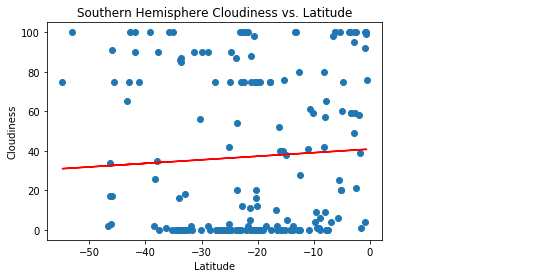

In [27]:
x_Lat = df_SouthHem['Lat']
y_Cld = df_SouthHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cld)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Cld)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 3.457307510894264e-05


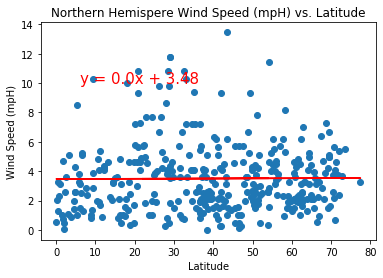

In [28]:
x_Lat = df_NorthHem['Lat']
y_Wnd = df_NorthHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Wnd)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Wnd)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpH)')
plt.title("Northern Hemispere Wind Speed (mpH) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.005889812174415488


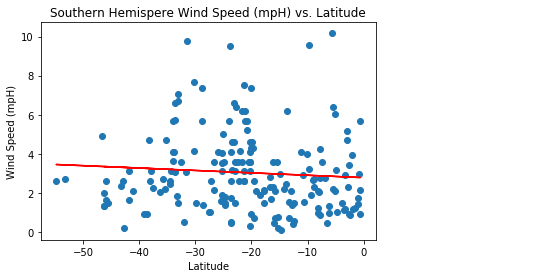

In [29]:
x_Lat = df_SouthHem['Lat']
y_Wnd = df_SouthHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Wnd)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Wnd)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpH)')
plt.title("Southern Hemispere Wind Speed (mpH) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()